# Demonstration: VQE algorithm for excited states

In [1]:
import pennylane as qml
from pennylane import numpy as np

import sys
sys.path.insert(0, '../')
import vqe
import visualization as qplt
import qcnn as qcnn 
import general as qmlgen
import losses
##############


In [14]:
Ns = range(4,13)
side = 100

path = '../data/vqes/ANNNI/'
pathplots = '../data/plots/'

train_index = np.arange(0,2*side-1)

In [15]:
vqes = []
for N in Ns:
    try:
        filename = 'N'+str(N)+'n'+str(side)
        vqes.append(vqe.load_vqe(path + filename) )
        print('{0} loaded sucessfully'.format(path+filename))
    except:
        print('{0} not found'.format(path+filename))

../data/vqes/ANNNI/N4n100 loaded sucessfully
../data/vqes/ANNNI/N5n100 not found
../data/vqes/ANNNI/N6n100 loaded sucessfully
../data/vqes/ANNNI/N7n100 not found
../data/vqes/ANNNI/N8n100 loaded sucessfully
../data/vqes/ANNNI/N9n100 not found
../data/vqes/ANNNI/N10n100 loaded sucessfully
../data/vqes/ANNNI/N11n100 not found
../data/vqes/ANNNI/N12n100 loaded sucessfully


In [4]:
cents = qmlgen.findC(*vqes, width = .15)

Cost: 0.08663661777973175: 100%|████████████| 1000/1000 [00:21<00:00, 45.90it/s]


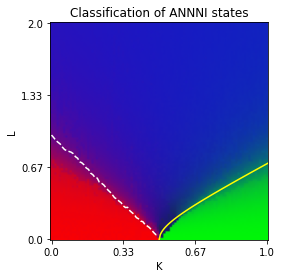

In [5]:
myqcnn = qcnn.qcnn(vqes[2], qcnn.qcnn_circuit, n_outputs = 2)
myqcnn.train(.2, 1000, train_index, losses.cross_entropy)

qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False, deltaeline = cents)